<a href="https://colab.research.google.com/github/firstiaaa/11_2241720135_Pemr_Mobile/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PRAKTIKUM

In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


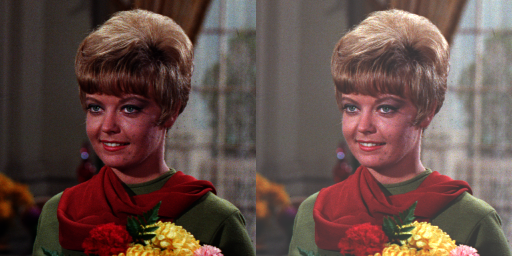

In [8]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta-brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

TUGAS PRAKTIKUM
---------------------------------------

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:  

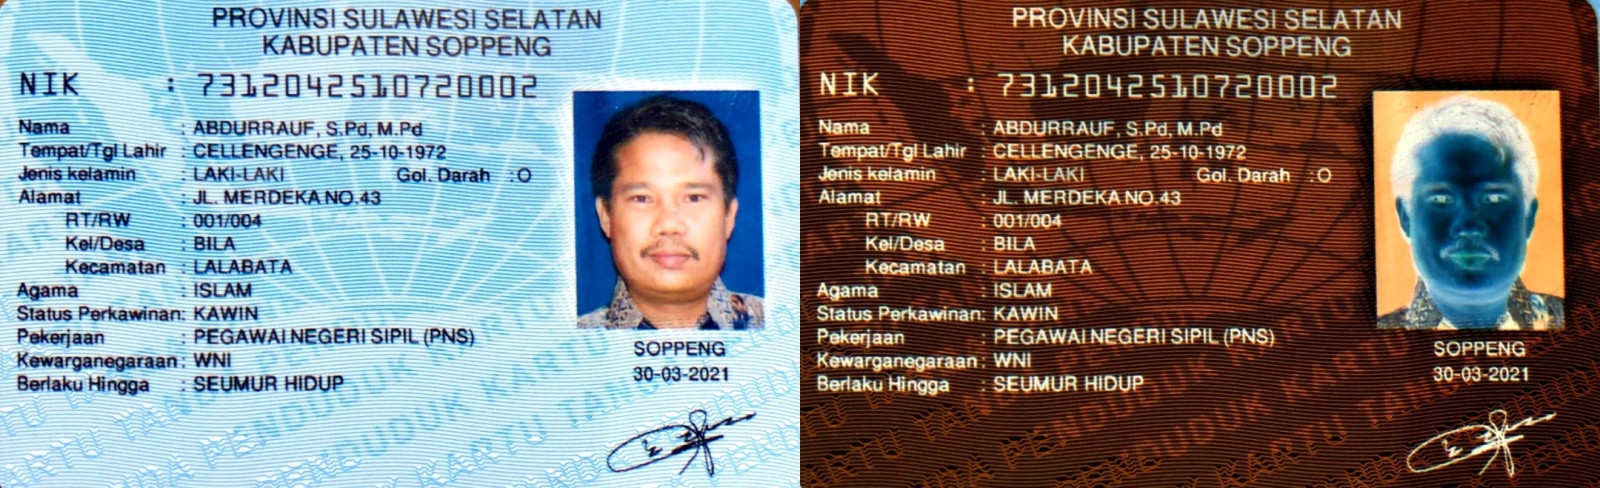

In [9]:
#Akses file image lokal
img = cv.imread('/content/drive/MyDrive/PCVK/KTP.jpeg')

# Menggunakan Inversi
img2 = 255 - img

# Menampilkan gambar asli dan yang sudah di inversi
final_frame = cv.hconcat((img, img2))
cv2_imshow(final_frame)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:

Mengubah kontras dan tingkat kecerahan citra
-------------------------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


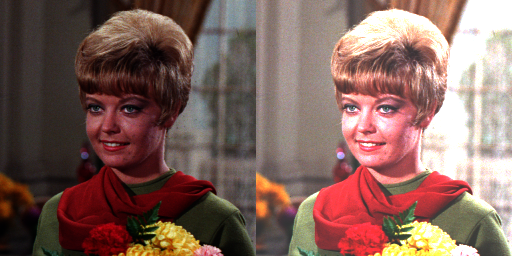

In [10]:

# Membaca gambar
img = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')

# Menampilkan judul
print("Mengubah kontras dan tingkat kecerahan citra")
print("-------------------------------------------------")

# Input tingkat kecerahan
beta = int(input("Masukkan tingkat kecerahan [-255 - 255]: "))
# Input tingkat kontras
alpha = float(input("Masukkan kontras [1.0 - 3.0]: "))

# Menerapkan transformasi kontras
contrast_img = cv.convertScaleAbs(img, alpha=alpha, beta=beta)

# Menampilkan gambar asli dan hasil kontras
final_frame = cv.hconcat((img, contrast_img))
cv2_imshow(final_frame)

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut:

Mengubah tingkat kecerahan citra dengan Transformasi Log
-------------------------------------------------
Masukkan nilai kecerahan: 50


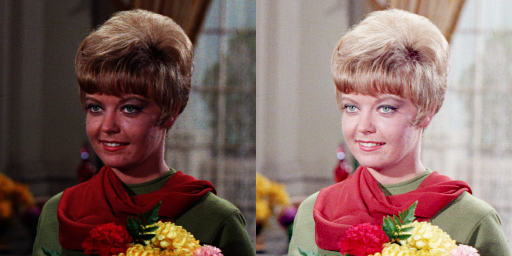

In [11]:
# Membaca gambar
img = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')

# Menampilkan judul
print("Mengubah tingkat kecerahan citra dengan Transformasi Log")
print("-------------------------------------------------")

# Input nilai kecerahan
c = float(input("Masukkan nilai kecerahan: "))

# Mengonversi gambar ke float32 untuk perhitungan log
img_float = img.astype(np.float32)

# Menerapkan transformasi log
log_img = c * np.log(1 + img_float)

# Normalisasi untuk mendapatkan nilai antara 0-255
log_img = cv.normalize(log_img, None, 0, 255, cv.NORM_MINMAX)
log_img = log_img.astype(np.uint8)

# Menampilkan gambar asli dan hasil transformasi log
final_frame = cv.hconcat((img, log_img))
cv2_imshow(final_frame)

4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

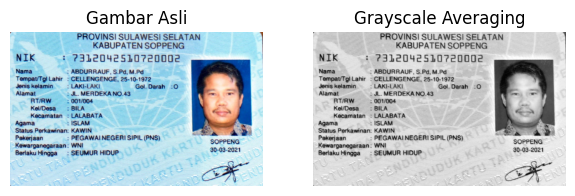

In [22]:
# A. AVERAGING

# Membaca gambar
img = cv.imread('/content/drive/MyDrive/PCVK/KTP.jpeg')
image_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # Konversi ke RGB untuk Matplotlib

# Pisahkan channel warna (R, G, B)
R, G, B = image_rgb[:, :, 0], image_rgb[:, :, 1], image_rgb[:, :, 2]

# 1. Grayscale menggunakan metode Averaging
gray_averaging = np.mean(image_rgb, axis=2)
gray_averaging = np.uint8(gray_averaging)  # Convert to uint8 for proper visualization

# Tampilkan gambar asli dan hasil transformasi grayscale
plt.figure(figsize=(15, 5))

# Gambar Asli
plt.subplot(1, 4, 1)
plt.imshow(image_rgb)
plt.title("Gambar Asli")
plt.axis("off")

# Grayscale Averaging
plt.subplot(1, 4, 2)
plt.imshow(gray_averaging, cmap='gray')
plt.title("Grayscale Averaging")
plt.axis("off")

# Tampilkan semua gambar
plt.show()

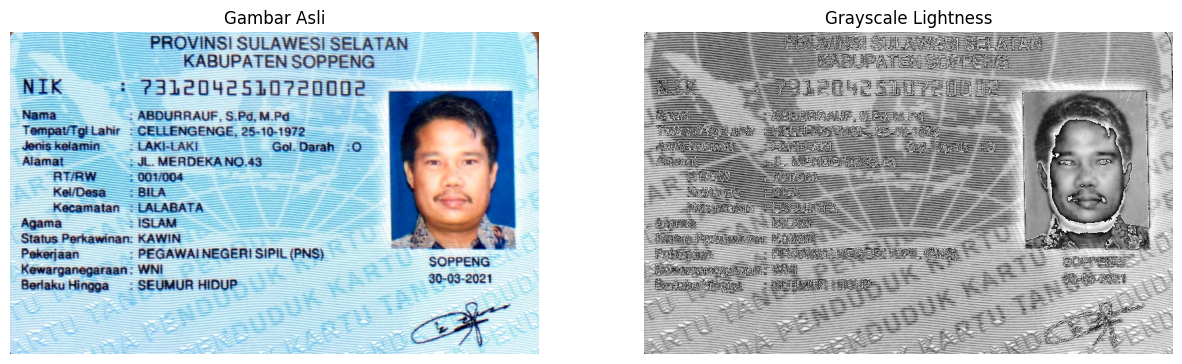

In [19]:
# B. LIGHTNESS

# Membaca gambar
img = cv.imread('/content/drive/MyDrive/PCVK/KTP.jpeg')
image_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # Konversi ke RGB untuk Matplotlib

# Pisahkan channel warna (R, G, B)
R, G, B = image_rgb[:, :, 0], image_rgb[:, :, 1], image_rgb[:, :, 2]

# Grayscale menggunakan metode Lightness
max_channel = np.maximum(R, np.maximum(G, B))
min_channel = np.minimum(R, np.minimum(G, B))
gray_lightness = (max_channel + min_channel) / 2
gray_lightness = np.uint8(gray_lightness)  # Convert to uint8 for proper visualization

# Tampilkan gambar asli dan hasil transformasi grayscale
plt.figure(figsize=(15, 15))

# Gambar Asli
plt.subplot(1, 2, 1)  # Mengubah menjadi 1x2
plt.imshow(image_rgb)
plt.title("Gambar Asli")
plt.axis("off")

# Grayscale Lightness
plt.subplot(1, 2, 2)  # Mengubah menjadi 1x2
plt.imshow(gray_lightness, cmap='gray')
plt.title("Grayscale Lightness")
plt.axis("off")

plt.show()

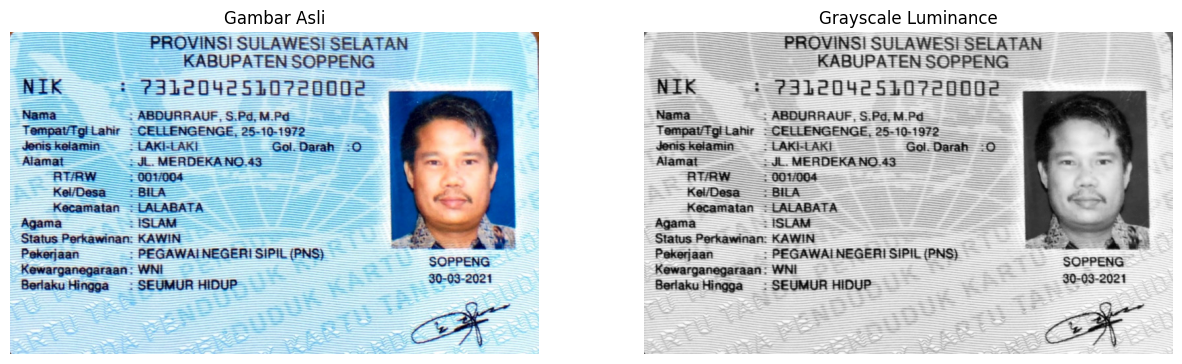

In [21]:
# C. LUMINANCE

# Membaca gambar
img = cv.imread('/content/drive/MyDrive/PCVK/KTP.jpeg')
image_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # Konversi ke RGB untuk Matplotlib

# Pisahkan channel warna (R, G, B)
R, G, B = image_rgb[:, :, 0], image_rgb[:, :, 1], image_rgb[:, :, 2]

# Grayscale menggunakan metode Luminance
gray_luminance = 0.299 * R + 0.587 * G + 0.114 * B
gray_luminance = np.uint8(gray_luminance)  # Convert to uint8 for proper visualization

# Tampilkan gambar asli dan hasil transformasi grayscale
plt.figure(figsize=(15, 5))

# Gambar Asli
plt.subplot(1, 2, 1)  # Mengubah menjadi 1x2
plt.imshow(image_rgb)
plt.title("Gambar Asli")
plt.axis("off")

# Grayscale Luminance
plt.subplot(1, 2, 2)  # Mengubah menjadi 1x2
plt.imshow(gray_luminance, cmap='gray')
plt.title("Grayscale Luminance")
plt.axis("off")

plt.show()

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale seperti pada contoh berikut:

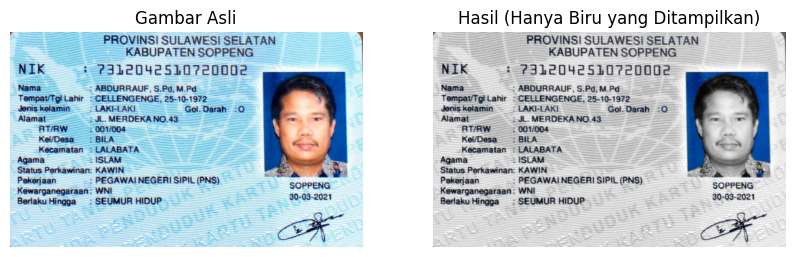

In [26]:

# Membaca gambar
img = cv.imread('/content/drive/MyDrive/PCVK/KTP.jpeg')
image_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # Konversi ke RGB untuk Matplotlib

# Membuat salinan gambar untuk memodifikasi
result_img = np.zeros_like(image_rgb)

# Mengubah gambar menjadi grayscale
gray_img = cv.cvtColor(image_rgb, cv.COLOR_RGB2GRAY)

# Menggunakan threshold untuk mendeteksi warna biru
# Menggunakan rentang warna biru dalam format RGB
lower_blue = np.array([0, 0, 100])
upper_blue = np.array([100, 100, 255])

# Membuat mask untuk warna biru
mask = cv.inRange(image_rgb, lower_blue, upper_blue)

# Membuat mask untuk area yang tidak biru
mask_inverted = cv.bitwise_not(mask)

# Mengubah bagian yang tidak biru menjadi grayscale
result_img[:, :, 0] = np.where(mask_inverted > 0, gray_img, image_rgb[:, :, 0])  # Channel R
result_img[:, :, 1] = np.where(mask_inverted > 0, gray_img, image_rgb[:, :, 1])  # Channel G
result_img[:, :, 2] = np.where(mask_inverted > 0, gray_img, image_rgb[:, :, 2])  # Channel B

# Tampilkan gambar asli dan hasil
plt.figure(figsize=(10, 5))

# Gambar Asli
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Gambar Asli")
plt.axis("off")

# Gambar Hasil
plt.subplot(1, 2, 2)
plt.imshow(result_img)
plt.title("Hasil (Hanya Biru yang Ditampilkan)")
plt.axis("off")

plt.show()